In [1]:
# Data source http://crimestat.ru/opendata 
file = r'Всего зарегистрировано преступлений.xml'

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

In [3]:
#Data Structure
#<data>
#    <indicatorData name="Всего зарегистрировано преступлений">
#        <row>
#            <value>971</value>
#            <report_period_begin>2009-01-01</report_period_begin>
#            <region_name>Ненецкий АО</region_name>
#            <report_period_end>2009-12-01</report_period_end>
#        </row>

In [4]:
xtree = ET.parse(file)
xroot = xtree.getroot()

In [168]:
for child in xroot:
    print (child.tag,'dd', child.attrib)

indicatorData dd {'name': 'Всего зарегистрировано преступлений'}


In [170]:
xroot[0].tag

'indicatorData'

In [185]:
# Find level of row
xroot[0][0].tag

'row'

In [186]:
# Get the list of all available parameters
for n in xroot[0][0]:
    print (n.tag)

value
report_period_begin
region_name
report_period_end


In [172]:
# Loop over rows and put data into a dictionary
rows = []
for row in xroot[0]:
    value = row.find("value").text
    report_period_begin = row.find("report_period_begin").text
    region_name  = row.find("region_name").text
    report_period_end = row.find('report_period_end').text
    
    rows.append({"value": value, "report_period_begin": report_period_begin, 
                 "region_name": region_name, "report_period_end": report_period_end})

In [173]:
# Convert dictionary into a dataframe
df_cols = ["value", "report_period_begin", "region_name", "report_period_end"]
out_df = pd.DataFrame(rows, columns = df_cols)

In [174]:
out_df.head()

,value,report_period_begin,region_name,report_period_end
0,971,2009-01-01,Ненецкий АО,2009-12-01
1,37372,2009-01-01,Ханты-Мансийский АО,2009-12-01
2,10052,2009-01-01,Ямало-Ненецкий АО,2009-12-01
3,25750,2009-01-01,Архангельская область,2009-12-01
4,40325,2009-01-01,Тюменская область,2009-12-01


In [175]:
# Correct datatypes
out_df.value = out_df.value.astype('int')
out_df.report_period_begin = out_df.report_period_begin.astype('datetime64[ns]')
out_df.report_period_end = out_df.report_period_end.astype('datetime64[ns]')
out_df.dtypes

value                           int32
report_period_begin    datetime64[ns]
region_name                    object
report_period_end      datetime64[ns]
dtype: object

In [180]:
# Filter out 2020 (Not finished year) and 2009()
out_df = out_df.where(out_df.report_period_begin.dt.year < 2020).dropna()
out_df = out_df.where(out_df.report_period_begin.dt.year > 2009).dropna()

In [181]:
sum_crime = out_df.groupby(by = 'report_period_begin').sum()

In [195]:
crimes_by_region = out_df.groupby(by = 'region_name').sum()
crimes_by_region.sort_values(by = 'value')

,value
region_name,
Ненецкий АО,47332.0
Чукотский АО,51204.0
Республика Ингушетия,115207.0
Магаданская область,207194.0
г. Севастополь,210368.0
...,...
Уральский ФО,14510433.0
Сибирский ФО,25234765.0
Приволжский ФО,28513899.0


In [182]:
sum_crime

,value
report_period_begin,
2010-01-01,51436550.0
2011-01-01,46800660.0
2012-01-01,44388619.0
2013-01-01,42665562.0
2014-01-01,41954583.0
2015-01-01,44841957.0
2016-01-01,43282876.0
2017-01-01,39662050.0
2018-01-01,38183190.0


Text(0.5, 1.0, 'Total number of crimes')

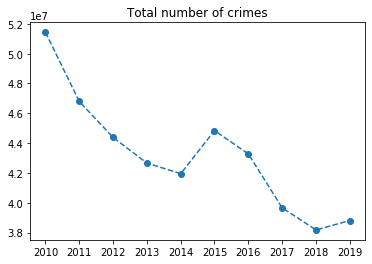

In [184]:
import matplotlib.pyplot as plt 
plt.plot(sum_crime.index,sum_crime.value,'o--')
plt.title('Total number of crimes')

In [147]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11513 entries, 0 to 11512
Data columns (total 4 columns):
value                  11513 non-null object
report_period_begin    11513 non-null object
region_name            11513 non-null object
report_period_end      11513 non-null object
dtypes: object(4)
memory usage: 359.9+ KB


In [149]:
# Get only Kurgan data
Kurgan = out_df.where(out_df.region_name == 'Курганская область').dropna()
Kurgan.value

28       24922
120       1626
212       3390
304       5587
396       7500
         ...  
11073    14702
11167    15971
11261    17101
11355     1518
11449     2913
Name: value, Length: 123, dtype: object

In [197]:
f = Kurgan.groupby(by = 'report_period_begin').sum()
f

,value
report_period_begin,
2010-01-01,151473.0
2011-01-01,143423.0
2012-01-01,130802.0
2013-01-01,124117.0
2014-01-01,128236.0
2015-01-01,143975.0
2016-01-01,131162.0
2017-01-01,116813.0
2018-01-01,114947.0


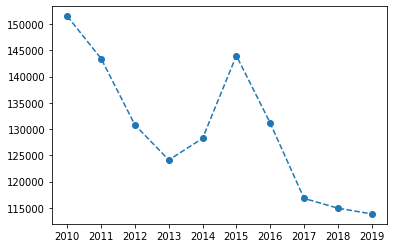

In [198]:
import matplotlib.pyplot as plt 
plt.plot(f.index,f.value,'o--')